In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# Reading Train data from csv file
tdata = pd.read_csv('./trainingset.csv',index_col=0)

# Reading Submission format data from csv file
sdata = pd.read_csv('./SubmissionRows.csv',index_col=0)

#Print Trainset
print(tdata.shape[0],sdata.shape[0])
tdata.head()


195402 737


,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],...,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],Country Name,Series Code,Series Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.769214,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All ...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.027746,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All ...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.244887,Afghanistan,allsa.bi_q1,(%) Benefits held by 1st 20% population - All ...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.933105,Afghanistan,allsi.gen_pop,(%) Generosity of All Social Insurance
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.996814,Afghanistan,allsp.gen_pop,(%) Generosity of All Social Protection


In [17]:
import csv
attname=['1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','l','CountryName','SeriesCode','SeriesName']
with open ('T1.csv','w') as t1:
        writer =csv.writer(t1)
        writer.writerow(attname)
t1.close()
subindex=sdata.index[:]
print(subindex)
for i in subindex:
    with open ('T1.csv','a') as t1:
        writer =csv.writer(t1)
        writer.writerow(tdata.loc[i])
    t1.close()

Int64Index([   559,    618,    753,   1030,   1896,   1955,   2090,   2690,
              3233,   3292,
            ...
            283137, 283460, 284003, 284062, 284197, 284474, 285340, 285399,
            285534, 285811],
           dtype='int64', length=737)


In [18]:
t2 = pd.read_csv('./T1.csv')
print(t2.shape[0])
t2.head()


737


,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2001,2002,2003,2004,2005,2006,l,CountryName,SeriesCode,SeriesName
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.256000,0.291000,0.325000,0.360000,0.395000,0.430000,0.4650,Afghanistan,7.80,Ensure environmental sustainability
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000047,0.000046,0.000879,0.001058,0.012241,0.021071,0.0190,Afghanistan,8.16,Develop a global partnership for development: ...
2,0.296,0.2909,0.2852,0.2798,0.2742,0.2683,0.2624,0.2565,0.2503,0.2439,...,0.131000,0.127700,0.124400,0.121000,0.117700,0.114500,0.1115,Afghanistan,4.10,Reduce child mortality
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.0010,Afghanistan,6.10,Combat HIV/AIDS
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.964000,0.964000,0.963000,0.963000,0.962000,0.962000,0.9610,Albania,7.80,Ensure environmental sustainability


In [14]:
# Transposing data 
transdata=t2.head(737).transpose()
transdata.head(37)


,0,1,2,3,4,5,6,7,8,9,...,727,728,729,730,731,732,733,734,735,736
1972,NaN,NaN,0.296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.805803,NaN,NaN,0.17,NaN,NaN,NaN,0.1087,NaN
1973,NaN,NaN,0.2909,NaN,NaN,NaN,NaN,0.676752,NaN,NaN,...,NaN,NaN,NaN,NaN,0.1651,NaN,NaN,NaN,0.1083,NaN
1974,NaN,NaN,0.2852,NaN,NaN,NaN,NaN,0.717112,NaN,NaN,...,NaN,NaN,NaN,NaN,0.161,NaN,NaN,NaN,0.1081,NaN
1975,NaN,NaN,0.2798,NaN,NaN,NaN,NaN,0.740751,NaN,NaN,...,NaN,NaN,NaN,NaN,0.1579,NaN,NaN,NaN,0.1081,NaN
1976,NaN,NaN,0.2742,NaN,NaN,NaN,NaN,0.758748,NaN,NaN,...,NaN,0.811311,NaN,NaN,0.1562,NaN,NaN,NaN,0.108,NaN
1977,NaN,NaN,0.2683,NaN,NaN,NaN,NaN,0.773166,NaN,NaN,...,NaN,0.806107,NaN,NaN,0.1558,NaN,NaN,NaN,0.1077,NaN
1978,NaN,NaN,0.2624,NaN,NaN,NaN,NaN,0.782735,NaN,NaN,...,NaN,0.792737,NaN,NaN,0.1562,NaN,NaN,NaN,0.1069,NaN
1979,NaN,NaN,0.2565,NaN,NaN,NaN,NaN,0.782891,NaN,NaN,...,NaN,0.788091,NaN,NaN,0.1568,NaN,NaN,NaN,0.1053,NaN
1980,NaN,NaN,0.2503,NaN,NaN,NaN,NaN,0.793252,NaN,NaN,...,NaN,0.790253,NaN,NaN,0.1581,NaN,NaN,NaN,0.1024,NaN
1981,NaN,NaN,0.2439,NaN,NaN,NaN,NaN,0.795066,NaN,NaN,...,NaN,0.794211,NaN,NaN,0.1594,NaN,NaN,NaN,0.0984,NaN


In [9]:
transdata2=transdata.head(36).loc[:,pd.notnull(transdata.head(36)).sum()>len(transdata.head(36))*.1]
transdata2.head()


,0,1,2,3,4,5,6,7,8,9,...,727,728,729,730,731,732,733,734,735,736
1972,NaN,NaN,0.296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.805803,NaN,NaN,0.17,NaN,NaN,NaN,0.1087,NaN
1973,NaN,NaN,0.2909,NaN,NaN,NaN,NaN,0.676752,NaN,NaN,...,NaN,NaN,NaN,NaN,0.1651,NaN,NaN,NaN,0.1083,NaN
1974,NaN,NaN,0.2852,NaN,NaN,NaN,NaN,0.717112,NaN,NaN,...,NaN,NaN,NaN,NaN,0.161,NaN,NaN,NaN,0.1081,NaN
1975,NaN,NaN,0.2798,NaN,NaN,NaN,NaN,0.740751,NaN,NaN,...,NaN,NaN,NaN,NaN,0.1579,NaN,NaN,NaN,0.1081,NaN
1976,NaN,NaN,0.2742,NaN,NaN,NaN,NaN,0.758748,NaN,NaN,...,NaN,0.811311,NaN,NaN,0.1562,NaN,NaN,NaN,0.108,NaN


In [10]:
transforward=transdata2.fillna(method='pad')
transforward.head()

,0,1,2,3,4,5,6,7,8,9,...,727,728,729,730,731,732,733,734,735,736
1972,NaN,NaN,0.2960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.805803,NaN,NaN,0.1700,NaN,NaN,NaN,0.1087,NaN
1973,NaN,NaN,0.2909,NaN,NaN,NaN,NaN,0.676752,NaN,NaN,...,NaN,0.805803,NaN,NaN,0.1651,NaN,NaN,NaN,0.1083,NaN
1974,NaN,NaN,0.2852,NaN,NaN,NaN,NaN,0.717112,NaN,NaN,...,NaN,0.805803,NaN,NaN,0.1610,NaN,NaN,NaN,0.1081,NaN
1975,NaN,NaN,0.2798,NaN,NaN,NaN,NaN,0.740751,NaN,NaN,...,NaN,0.805803,NaN,NaN,0.1579,NaN,NaN,NaN,0.1081,NaN
1976,NaN,NaN,0.2742,NaN,NaN,NaN,NaN,0.758748,NaN,NaN,...,NaN,0.811311,NaN,NaN,0.1562,NaN,NaN,NaN,0.1080,NaN


In [11]:
transback=transforward.fillna(method='backfill')
transback.head()



,0,1,2,3,4,5,6,7,8,9,...,727,728,729,730,731,732,733,734,735,736
1972,0.048,0.0,0.2960,0.001,0.964,0.0,0.0516,0.676752,0.939,0.0,...,0.001,0.805803,0.491,0.0,0.1700,0.104,0.792,0.0,0.1087,0.107
1973,0.048,0.0,0.2909,0.001,0.964,0.0,0.0516,0.676752,0.939,0.0,...,0.001,0.805803,0.491,0.0,0.1651,0.104,0.792,0.0,0.1083,0.107
1974,0.048,0.0,0.2852,0.001,0.964,0.0,0.0516,0.717112,0.939,0.0,...,0.001,0.805803,0.491,0.0,0.1610,0.104,0.792,0.0,0.1081,0.107
1975,0.048,0.0,0.2798,0.001,0.964,0.0,0.0516,0.740751,0.939,0.0,...,0.001,0.805803,0.491,0.0,0.1579,0.104,0.792,0.0,0.1081,0.107
1976,0.048,0.0,0.2742,0.001,0.964,0.0,0.0516,0.758748,0.939,0.0,...,0.001,0.811311,0.491,0.0,0.1562,0.104,0.792,0.0,0.1080,0.107


In [12]:
transposeddata=transback.transpose()
transposeddata.head()

,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,l
0,0.048,0.0480,0.0480,0.0480,0.0480,0.0480,0.0480,0.0480,0.0480,0.0480,...,0.1520,0.1870,0.2210,0.256000,0.291000,0.325000,0.360000,0.395000,0.430000,0.4650
1,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.000047,0.000046,0.000879,0.001058,0.012241,0.021071,0.0190
2,0.296,0.2909,0.2852,0.2798,0.2742,0.2683,0.2624,0.2565,0.2503,0.2439,...,0.1391,0.1366,0.1339,0.131000,0.127700,0.124400,0.121000,0.117700,0.114500,0.1115
3,0.001,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,...,0.0010,0.0010,0.0010,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.0010
4,0.964,0.9640,0.9640,0.9640,0.9640,0.9640,0.9640,0.9640,0.9640,0.9640,...,0.9650,0.9650,0.9650,0.964000,0.964000,0.963000,0.963000,0.962000,0.962000,0.9610


In [12]:
####model buliding####


In [13]:
d4=transposeddata
y=d4.l
x=d4.drop('l',axis=1)
x.head(737)


,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
0,0.048000,0.048000,0.048000,0.048000,0.048000,0.048000,0.048000,0.048000,0.048000,0.048000,...,0.118000,0.152000,0.187000,0.221000,0.256000,0.291000,0.325000,0.360000,0.395000,0.430000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000047,0.000046,0.000879,0.001058,0.012241,0.021071
2,0.296000,0.290900,0.285200,0.279800,0.274200,0.268300,0.262400,0.256500,0.250300,0.243900,...,0.141700,0.139100,0.136600,0.133900,0.131000,0.127700,0.124400,0.121000,0.117700,0.114500
3,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
4,0.964000,0.964000,0.964000,0.964000,0.964000,0.964000,0.964000,0.964000,0.964000,0.964000,...,0.965000,0.965000,0.965000,0.965000,0.964000,0.964000,0.963000,0.963000,0.962000,0.962000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000486,0.000650,0.000814,0.001141,0.003258,0.003901,0.009719,0.024204,0.060439,0.096100
6,0.051600,0.051600,0.051600,0.051600,0.051600,0.051600,0.051600,0.051600,0.051600,0.051600,...,0.032900,0.031500,0.030000,0.028600,0.027100,0.025700,0.024500,0.023300,0.022200,0.021200
7,0.676752,0.676752,0.717112,0.740751,0.758748,0.773166,0.782735,0.782891,0.793252,0.795066,...,0.844342,0.844342,0.878822,0.890507,0.915648,0.932315,0.939567,0.946588,0.946235,0.942501
8,0.939000,0.939000,0.939000,0.939000,0.939000,0.939000,0.939000,0.939000,0.939000,0.939000,...,0.914000,0.908000,0.901000,0.894000,0.887000,0.881000,0.874000,0.866000,0.859000,0.852000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000103,0.000202,0.001995,0.004917,0.006461,0.015916,0.021954,0.046345,0.058439,0.073760


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)



In [15]:
x_test.head(100)


,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
656,0.484000,0.484000,0.484000,0.484000,0.484000,0.484000,0.484000,0.484000,0.484000,0.484000,...,0.518000,0.523000,0.528000,0.534000,0.539000,0.544000,0.549000,0.555000,0.560000,0.566000
690,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,...,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000
378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000045,0.000041,0.000113,0.000177,0.000338,0.000327,0.000319,0.000310,0.000310,0.000310
249,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
681,0.416000,0.416000,0.416000,0.416000,0.416000,0.416000,0.416000,0.416000,0.416000,0.416000,...,0.521000,0.535000,0.550000,0.565000,0.580000,0.594000,0.610000,0.625000,0.641000,0.656000
527,0.006000,0.006000,0.006000,0.006000,0.006000,0.006000,0.006000,0.006000,0.006000,0.006000,...,0.008000,0.008000,0.007000,0.007000,0.006000,0.006000,0.005000,0.005000,0.005000,0.005000
480,0.940000,0.940000,0.940000,0.940000,0.940000,0.940000,0.940000,0.940000,0.940000,0.940000,...,0.940000,0.940000,0.940000,0.940000,0.940000,0.940000,0.945000,0.950000,0.955000,0.960000
290,0.728000,0.728000,0.728000,0.728000,0.728000,0.728000,0.728000,0.728000,0.728000,0.728000,...,0.785000,0.793000,0.800000,0.808000,0.816000,0.824000,0.832000,0.839000,0.847000,0.854000
561,0.920000,0.920000,0.920000,0.920000,0.920000,0.920000,0.920000,0.920000,0.920000,0.920000,...,0.940000,0.943000,0.947000,0.950000,0.954000,0.957000,0.960000,0.964000,0.967000,0.970000
385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009784,0.019721,0.029231,0.064271,0.071794,0.176900,0.259100,0.312300,0.362200,0.439000


In [70]:
#kfolds#

rmse: 0.03584426406003931
724


Text(0,0.5,'Predictions')

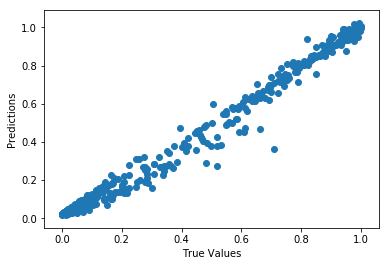

In [103]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import accuracy_score

X=np.array(x)
Y=np.array(y)
from sklearn.model_selection import RepeatedKFold
kf = RepeatedKFold(n_splits=5, n_repeats=1, random_state=None) 
kf.get_n_splits(X)
print(kf)

for train_index, test_index in kf.split(X):
    #print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index],X[test_index] 
    Y_train, Y_test =Y[train_index], Y[test_index]
    model11 = Ridge(alpha=0.05, normalize=True)
    model11.fit(X[train_index],Y[train_index])
    pred11=model11.predict(X[test_index] )
    #rmse=mean_squared_error(pred11,Y[test_index])**0.5
    #print('rmse:',rmse)

cvp = cross_val_predict(model11, X, Y, cv=5)
#print('cvp:',cvp)
rmse=mean_squared_error(cvp,Y)**0.5
print('rmse:',rmse)
accuracy = accuracy_score(cvp.astype(int), Y.astype(int),normalize=False)
print(accuracy)
    
    
    
plt.scatter(Y, cvp)
plt.xlabel('True Values')
plt.ylabel('Predictions')    

rmse: 0.02533032746415787
731


Text(0,0.5,'Predictions')

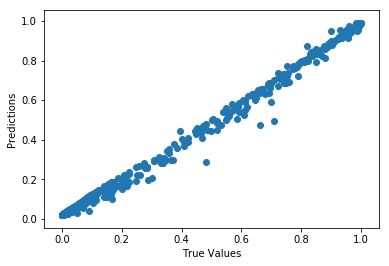

In [109]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import accuracy_score

X=np.array(x)
Y=np.array(y)
from sklearn.model_selection import RepeatedKFold
kf = RepeatedKFold(n_splits=5, n_repeats=1, random_state=None) 
kf.get_n_splits(X)
print(kf)

for train_index, test_index in kf.split(X):
    #print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index],X[test_index] 
    Y_train, Y_test =Y[train_index], Y[test_index]
    model21 = Lasso(alpha=0.0005, normalize=True)
    model21.fit(X[train_index],Y[train_index])
    pred21 = model21.predict(X[test_index])


    #rmse=mean_squared_error(pred11,Y[test_index])**0.5
    #print('rmse:',rmse)

cvp2 = cross_val_predict(model21, X, Y, cv=5)
#print('cvp:',cvp)
rmse=mean_squared_error(cvp2,Y)**0.5
print('rmse:',rmse)
accuracy = accuracy_score(cvp2.astype(int), Y.astype(int),normalize=False)
print(accuracy)

plt.scatter(Y, cvp2)
plt.xlabel('True Values')
plt.ylabel('Predictions')    
    

rmse: 0.03310641710426097
719


Text(0,0.5,'Predictions')

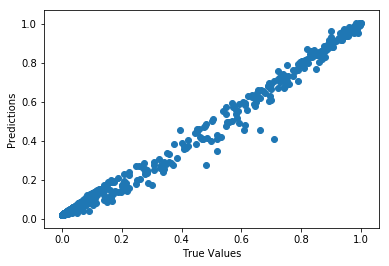

In [110]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import accuracy_score

X=np.array(x)
Y=np.array(y)
from sklearn.model_selection import RepeatedKFold
kf = RepeatedKFold(n_splits=5, n_repeats=1, random_state=None) 
kf.get_n_splits(X)
print(kf)

for train_index, test_index in kf.split(X):
    #print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index],X[test_index] 
    Y_train, Y_test =Y[train_index], Y[test_index]
    model31 = ElasticNet(alpha=0.005, l1_ratio=0.4, normalize=False)
    model31.fit(X[train_index],Y[train_index])
    pred31 =model31.predict(X[test_index] )


    #rmse=mean_squared_error(pred11,Y[test_index])**0.5
    #print('rmse:',rmse)

cvp3 = cross_val_predict(model31, X, Y, cv=5)
#print('cvp:',cvp)
rmse=mean_squared_error(cvp3,Y)**0.5
print('rmse:',rmse)
accuracy = accuracy_score(cvp3.astype(int), Y.astype(int),normalize=False)
print(accuracy)


plt.scatter(Y, cvp3)
plt.xlabel('True Values')
plt.ylabel('Predictions')    

rmse: 0.018514190123857372
725


Text(0,0.5,'Predictions')

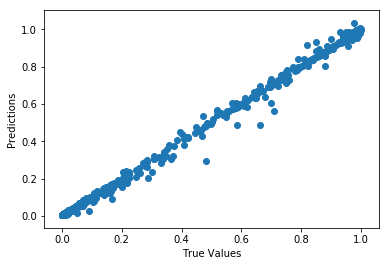

In [112]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import accuracy_score

X=np.array(x)
Y=np.array(y)
from sklearn.model_selection import RepeatedKFold
kf = RepeatedKFold(n_splits=5, n_repeats=1, random_state=None) 
kf.get_n_splits(X)
print(kf)

for train_index, test_index in kf.split(X):
    #print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index],X[test_index] 
    Y_train, Y_test =Y[train_index], Y[test_index]
    model41 = linear_model.BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
    fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
    normalize=False, tol=0.001, verbose=False)
    model41.fit(x_train,y_train)
    pred4=model41.predict (x_test)
    #rmse=mean_squared_error(pred11,Y[test_index])**0.5
    #print('rmse:',rmse)

cvp4 = cross_val_predict(model41, X, Y, cv=5)
#print('cvp:',cvp)
rmse=mean_squared_error(cvp4,Y)**0.5
print('rmse:',rmse)
accuracy = accuracy_score(cvp4.astype(int), Y.astype(int),normalize=False)
print(accuracy)
    
plt.scatter(Y, cvp4)
plt.xlabel('True Values')
plt.ylabel('Predictions')    

/home/nehal/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nehal/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nehal/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nehal/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nehal/anaconda3/lib/python3.6/site-package

rmse: 0.021326611089463293
731


Text(0,0.5,'Predictions')

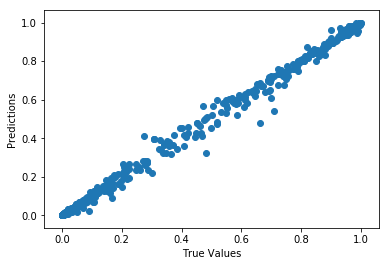

In [113]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import accuracy_score

X=np.array(x)
Y=np.array(y)
from sklearn.model_selection import RepeatedKFold
kf = RepeatedKFold(n_splits=5, n_repeats=1, random_state=None) 
kf.get_n_splits(X)
print(kf)

for train_index, test_index in kf.split(X):
    #print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index],X[test_index] 
    Y_train, Y_test =Y[train_index], Y[test_index]
    model51= RandomForestRegressor()
    model51.fit(X[train_index], Y[train_index])
    pred51=model51.predict(X[test_index])
    #print(pred51)
    #rmse=mean_squared_error(pred11,Y[test_index])**0.5
    #print('rmse:',rmse)

cvp5 = cross_val_predict(model51, X, Y, cv=5)
#print('cvp:',cvp)
rmse=mean_squared_error(cvp5,Y)**0.5
print('rmse:',rmse)
accuracy = accuracy_score(cvp5.astype(int), Y.astype(int),normalize=False)
print(accuracy)

plt.scatter(Y, cvp5)
plt.xlabel('True Values')
plt.ylabel('Predictions')    
    

rmse: 0.03066791129393978
731


Text(0,0.5,'Predictions')

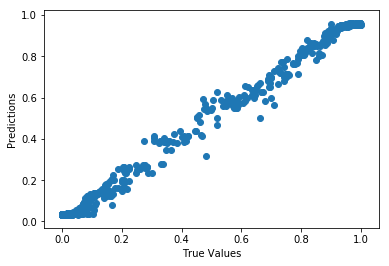

In [114]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import accuracy_score

X=np.array(x)
Y=np.array(y)
from sklearn.model_selection import RepeatedKFold
kf = RepeatedKFold(n_splits=5, n_repeats=1, random_state=None) 
kf.get_n_splits(X)
print(kf)

for train_index, test_index in kf.split(X):
    #print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index],X[test_index] 
    Y_train, Y_test =Y[train_index], Y[test_index]
    model61 = AdaBoostRegressor()
    model61.fit(X[train_index],Y[train_index])
    pred61=model61.predict(X[test_index])
    #print(pred51)
    #rmse=mean_squared_error(pred11,Y[test_index])**0.5
    #print('rmse:',rmse)

cvp6= cross_val_predict(model61, X, Y, cv=5)
#print('cvp:',cvp)
rmse=mean_squared_error(cvp6,Y)**0.5
print('rmse:',rmse)
accuracy = accuracy_score(cvp6.astype(int), Y.astype(int),normalize=False)
print(accuracy)


plt.scatter(Y, cvp6)
plt.xlabel('True Values')
plt.ylabel('Predictions')    